<a href="https://colab.research.google.com/github/AdryanoPitanga/Data-analysis/blob/main/Covid_19_Mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: COVID 19 mundial

### Esse projeto visa aplicar algorítimos de machine learning para análise e previsão da evolução da COVID 19 do perído de 04/02/2019 a 05/09/2019

## Fonte dos dados

https://github.com/seade-R/dados-covid-sp

## Análise e exploração dos dados

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
covidmundial = pd.read_csv('/content/drive/MyDrive/Dados Python/covid19_mundial.csv', sep = ',', encoding='utf-8')

In [ ]:
covidmundial

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
39428,2020-08-31,ZW,Zimbabwe,AFRO,6,6412,0,196
39429,2020-09-01,ZW,Zimbabwe,AFRO,85,6497,6,202
39430,2020-09-02,ZW,Zimbabwe,AFRO,62,6559,1,203
39431,2020-09-03,ZW,Zimbabwe,AFRO,79,6638,3,206


In [ ]:
#Número de mortes acumuladas por país
totaldeaths = covidmundial.groupby('country').cumulative_deaths.max()

In [ ]:
#organização em forma decrescente
totaldeaths.sort_values(ascending=False).head(15)

,cumulative_deaths
country,
United States of America,184614
Brazil,123780
India,68472
Mexico,65816
The United Kingdom,41527
Italy,35507
France,30556
Peru,29259
Spain,29234


In [ ]:
#casos acumulados por país
totalcases = covidmundial.groupby('country').cumulative_cases.max()

In [ ]:
#ordenar de forma decrescente o número de casos
totalcases.sort_values(ascending=False).head(15)

,cumulative_cases
country,
United States of America,6050444
Brazil,3997865
India,3936747
Russian Federation,1015105
Peru,663437
Colombia,633339
South Africa,633015
Mexico,610957
Spain,488513


In [ ]:
covidbrasil = covidmundial[covidmundial['country'] == 'Brazil']

In [ ]:
covidbrasil

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
5083,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5084,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5085,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5086,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [ ]:
df = covidbrasil[['new_cases', 'new_deaths', 'cumulative_cases', 'cumulative_deaths']]
df

In [ ]:
#Análise dos tipos de variáveis
covidmundial.dtypes

,0
date,datetime64[ns]
country_code,object
country,object
who_region,object
new_cases,int64
cumulative_cases,int64
new_deaths,int64
cumulative_deaths,int64


In [ ]:
#Transformar valores das variáveis
covidmundial['date'] = pd.to_datetime(covidmundial['date'])

<ipython-input-87-19fe1ec924de>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Localizar valores missing
covidmundial.isnull().sum()

,0
date,0
country_code,175
country,0
who_region,0
new_cases,0
cumulative_cases,0
new_deaths,0
cumulative_deaths,0


In [ ]:
covidbrasil.isnull().sum()

,0
date,0
country_code,0
country,0
who_region,0
new_cases,0
cumulative_cases,0
new_deaths,0
cumulative_deaths,0


In [ ]:
covidmundial.loc[covidmundial.new_deaths < 0, : ].count()

,0
date,28
country_code,28
country,28
who_region,28
new_cases,28
cumulative_cases,28
new_deaths,28
cumulative_deaths,28


In [ ]:
#Exclusão de valores negativos de novas mortes
covidmundial = covidmundial.loc[covidmundial.new_deaths >= 0, :]
covidmundial

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
39428,2020-08-31,ZW,Zimbabwe,AFRO,6,6412,0,196
39429,2020-09-01,ZW,Zimbabwe,AFRO,85,6497,6,202
39430,2020-09-02,ZW,Zimbabwe,AFRO,62,6559,1,203
39431,2020-09-03,ZW,Zimbabwe,AFRO,79,6638,3,206


In [ ]:
#criação de dataframe com a soma de todas as mortes dos países por data
covidmundial_sum = covidmundial.groupby('date').agg({'cumulative_deaths':'sum' , 'cumulative_cases' :'sum'})
covidmundial_sum


,cumulative_deaths,cumulative_cases
date,,
2020-01-04,0,1
2020-01-05,0,1
2020-01-06,0,4
2020-01-07,0,4
2020-01-08,0,4
...,...,...
2020-08-31,844473,25144425
2020-09-01,848453,25357123
2020-09-02,852823,25606112


## Análise estatística

In [ ]:
covidbrasil.describe()

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,192.000000,1.920000e+02,192.000000,192.000000
mean,20822.213542,1.097211e+06,644.687500,41098.796875
std,19158.201448,1.268914e+06,482.608603,41370.781794
min,0.000000,5.000000e+00,0.000000,0.000000
25%,1819.250000,2.180850e+04,114.750000,1198.250000
50%,17259.000000,4.818030e+05,631.500000,28356.000000
75%,38775.500000,2.020695e+06,1112.750000,76978.750000
max,69074.000000,3.997865e+06,1595.000000,123780.000000


In [ ]:
covidbrasil.new_cases.mode()

,new_cases
0,0


In [ ]:
covidbrasil.new_deaths.mode()

,new_deaths
0,0


### Análise de Outliers

In [ ]:
import plotly.express as px

In [ ]:
px.box(covidbrasil, y = 'cumulative_deaths')

In [ ]:
px.box(covidbrasil, y = 'cumulative_cases')

### Análise de normalidade

In [ ]:
import seaborn as sns

<Axes: xlabel='cumulative_deaths', ylabel='Count'>

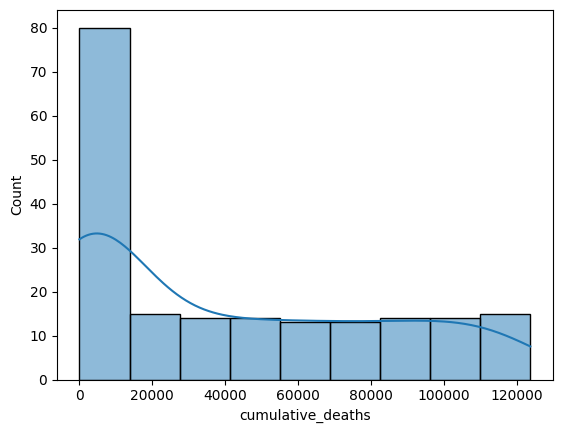

In [ ]:
sns.histplot(covidbrasil.cumulative_deaths, kde = True)

<Axes: xlabel='cumulative_cases', ylabel='Count'>

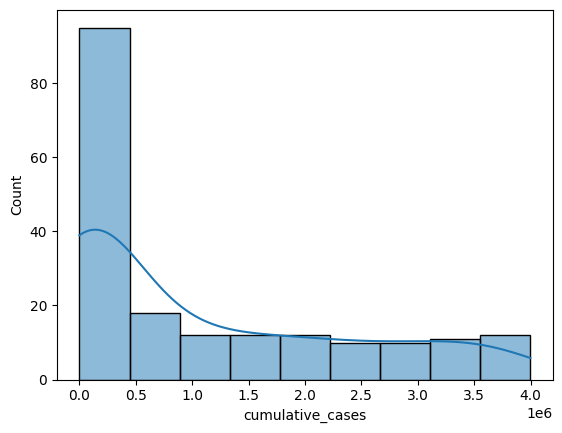

In [ ]:
sns.histplot(covidbrasil.cumulative_cases, kde = True)

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

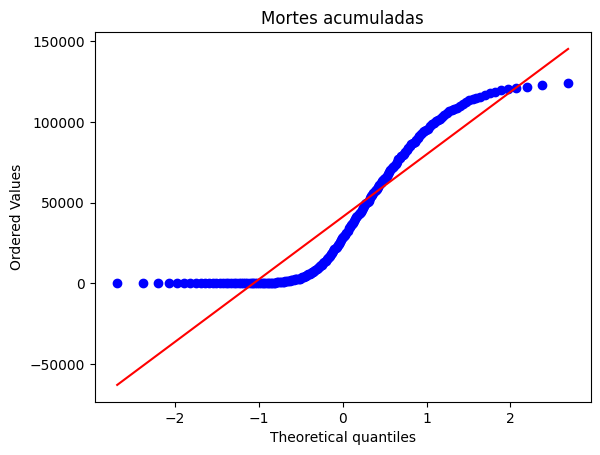

In [ ]:
stats.probplot(covidbrasil.cumulative_deaths, dist = 'norm', plot = plt)
plt.title('Mortes acumuladas')
plt.show()

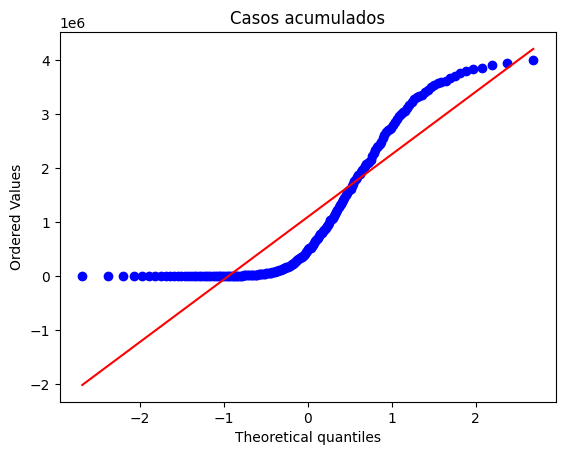

In [ ]:
stats.probplot(covidbrasil.cumulative_cases, dist = 'norm', plot = plt)
plt.title('Casos acumulados')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica , p_valor = lilliefors(covidbrasil.cumulative_deaths, dist='norm')
print('Estatística: ', round(estatistica,2))
print('p-valor: ', round(p_valor,3))

Estatística:  0.17
p-valor:  0.001


In [ ]:
estatistica, p_valor = lilliefors(covidbrasil.cumulative_cases)
print('Estatística: ', round(estatistica,2))
print('p-valor: ', p_valor)

Estatística:  0.2
p-valor:  0.0009999999999998899


### Gráfico de dispersão em função das datas

In [ ]:
disp = px.scatter(covidbrasil, x = 'date', y = 'cumulative_deaths', color = 'country', title='Numero de casos acumulados')
disp.update_layout(width = 1000, height = 600)
disp.update_xaxes(title = 'DATAS')
disp.update_yaxes(title = 'MORTES ACUMULADAS')
disp.show()

In [ ]:
disp = px.scatter(covidbrasil, x = 'date', y = 'cumulative_cases', color = 'country', title='Numero de casos acumulados')
disp.update_layout(width = 1000, height = 600)
disp.update_xaxes(title = 'DATAS')
disp.update_yaxes(title = 'CASOS ACUMULADOS')
disp.show()

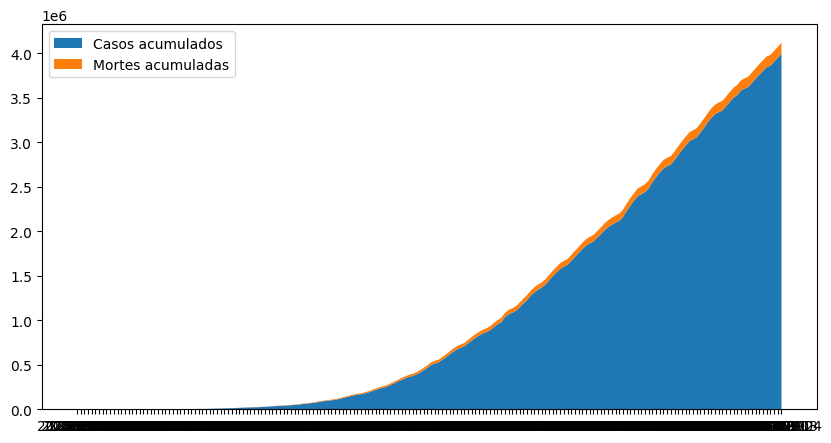

In [ ]:
plt.subplots(figsize=(10,5))
plt.stackplot(covidbrasil.date,covidbrasil.cumulative_cases,covidbrasil.cumulative_deaths)
plt.legend(['Casos acumulados','Mortes acumuladas'])
plt.show()

### Correlação Linear

In [ ]:
correlacoes = df.corr(method ='spearman')

In [ ]:
correlacoes

,new_cases,new_deaths,cumulative_cases,cumulative_deaths
new_cases,1.000000,0.916165,0.910545,0.910210
new_deaths,0.916165,1.000000,0.784347,0.784867
cumulative_cases,0.910545,0.784347,1.000000,0.999354
cumulative_deaths,0.910210,0.784867,0.999354,1.000000


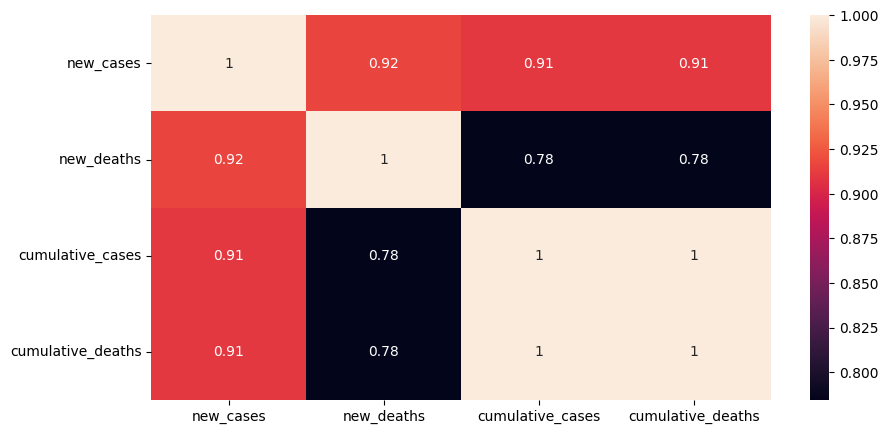

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlacoes, annot = True)
plt.show()

## Machine Learning

### Regressão Linear Simples

In [ ]:
covidbrasil

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
5083,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5084,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5085,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5086,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [ ]:
import plotly.express as px

In [ ]:
disp = px.scatter(covidbrasil, x = 'new_cases', y = 'new_deaths', color = 'country', title='Numero de casos acumulados')
disp.show()

In [ ]:
x = covidbrasil.iloc[:, 4].values
y = covidbrasil.iloc[:, 6].values

In [ ]:
x

In [ ]:
y

In [ ]:
#transformando em matriz
x = x.reshape(-1,1)
y = y.reshape(-1,1)

### Separando teste e treinamento

In [ ]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.25, random_state = 2)

In [ ]:
x_treinamento

In [ ]:
x_teste

In [ ]:
x_treinamento.size

144

In [ ]:
x_teste.size


48

### Criação do modelo de regrssão linear

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_treinamento, y_treinamento)
score = regressor.score(x_treinamento, y_treinamento)
print('Precisão do modelo: ', score)

Precisão do modelo:  0.7706687225813502


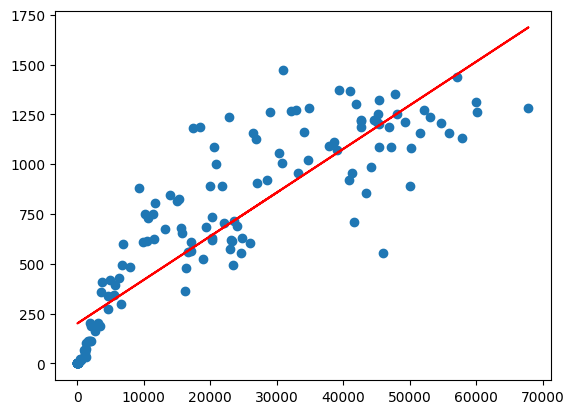

In [ ]:
#Gráfico com dados de treinamento
import matplotlib.pyplot as plt
plt.scatter(x_treinamento, y_treinamento)
plt.plot(x_treinamento, regressor.predict(x_treinamento), color = 'red')

In [ ]:
previsoes = regressor.predict(x_teste)

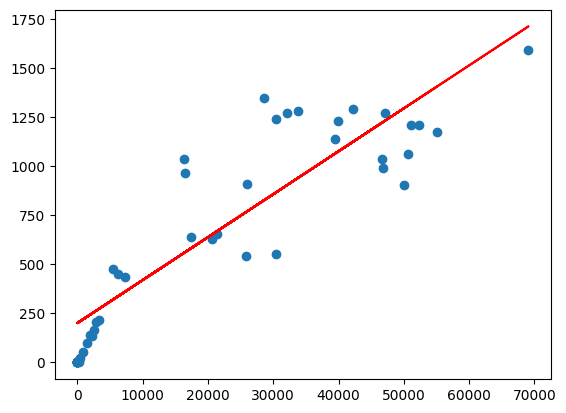

In [ ]:
#Gráfico com os dados de teste
plt.scatter(x_teste, y_teste)
plt.plot(x_teste, regressor.predict(x_teste), color = 'red')

In [ ]:
previsao = regressor.predict([[80000]])
previsao

array([[1951.4593068]])

In [ ]:
#Coeficiente Angular
regressor.coef_

array([[0.02188025]])

In [ ]:
#Coeficiente Linear
regressor.intercept_

array([201.03943886])

### Métricas de desempenho


In [ ]:
#Coeficiente de Determinação (R^2)
regressor.score(x_teste, y_teste)

0.8194463380519905

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
print('MAE: ', mean_absolute_error(y_teste, previsoes))
print('MSE: ', mean_squared_error(y_teste, previsoes))
print('RMSE: ', np.sqrt(mean_squared_error(y_teste, previsoes)))

MAE:  192.0478857729403
MSE:  49488.28727462369
RMSE:  222.4596306627872


### Regressão Polinomial

In [ ]:
covidbrasil

,date,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4896,2020-02-26,BR,Brazil,AMRO,5,5,0,0
4897,2020-02-27,BR,Brazil,AMRO,0,5,0,0
4898,2020-02-28,BR,Brazil,AMRO,0,5,0,0
4899,2020-02-29,BR,Brazil,AMRO,0,5,0,0
4900,2020-03-01,BR,Brazil,AMRO,1,6,0,0
...,...,...,...,...,...,...,...,...
5083,2020-08-31,BR,Brazil,AMRO,41350,3846153,958,120462
5084,2020-09-01,BR,Brazil,AMRO,16158,3862311,366,120828
5085,2020-09-02,BR,Brazil,AMRO,45961,3908272,553,121381
5086,2020-09-03,BR,Brazil,AMRO,42659,3950931,1215,122596


In [ ]:
x = covidbrasil.iloc[:, 0].values

In [ ]:
x

array(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-

In [ ]:
x = np.arange(1,len(x)+1).reshape(-1,1)
x

In [ ]:
y = covidbrasil.iloc[:, 5].values

In [ ]:
y = y.reshape(-1,1)

### Separando base de dados em treino e teste

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [ ]:
x_treinamento.size

134

In [ ]:
y_treinamento.size

134

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
x_treinamento_poly = poly.fit_transform(x_treinamento)
x_teste_poly = poly.transform(x_teste)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_treinamento_poly, y_treinamento)
score = regressor.score(x_treinamento_poly, y_treinamento)
print('Precisão do modelo: ', score)

Precisão do modelo:  0.9998298755711251


In [ ]:
previsoes = regressor.predict(x_teste_poly)

In [ ]:
#Criação da sequência pra previsão
forecast = np.arange(len(x)+20).reshape(-1,1) # +20 para prever 20 a mais
forecast

In [ ]:
forecast.shape

(212, 1)

In [ ]:
x_train_total = poly.transform(forecast)
x_train_total.shape

(212, 5)

In [ ]:
previsao_total = regressor.predict(x_train_total)
len(previsao_total)

212

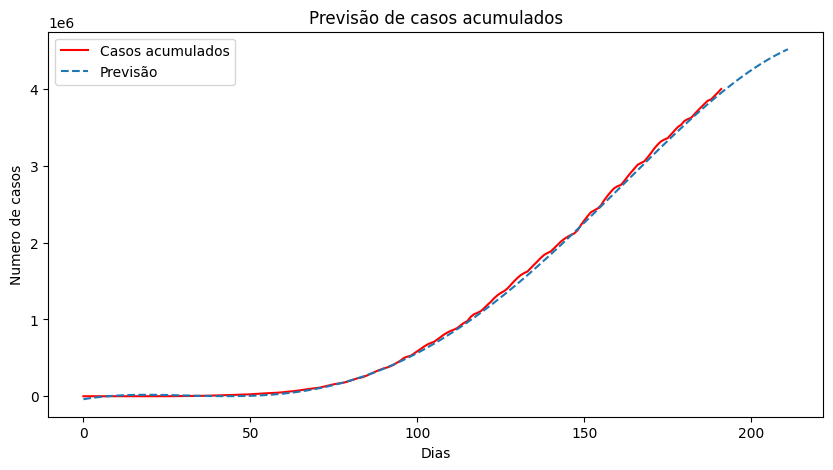

In [ ]:
plt.subplots(figsize=(10,5))
plt.plot(forecast[:-20], y, color = 'red')
plt.plot(forecast,previsao_total,linestyle = 'dashed')
plt.title('Previsão de casos acumulados')
plt.xlabel('Dias')
plt.ylabel('Numero de casos')
plt.legend(['Casos acumulados','Previsão'])
plt.show()

In [ ]:
previsao_total[200]

array([4242430.84828091])

### Métricas de desempenho

In [ ]:
#Coeficiente de determinação
score

0.9998298755711251

In [ ]:
print('MAE: ', mean_absolute_error(y_teste, previsoes))
print('MSE: ', mean_squared_error(y_teste, previsoes))
print('RMSE: ', np.sqrt(mean_squared_error(y_teste, previsoes)))

MAE:  13736.783478112799
MSE:  254930112.24036556
RMSE:  15966.531002079493
